# Crime Prediction 

Author: Rohit Chandulal Sharma, Samil Shah, Vidit Virmani

Dataset: http://archive.ics.uci.edu/ml/datasets/communities+and+crime
         http://archive.ics.uci.edu/ml/datasets/communities+and+crime+unnormalized

Aim: To build models to predict the crime rate based on demographic and economic information about the particular locality

Attribute to be predicted: Per Capita Violent Crimes

The variables included in the dataset involve the community, such as the percent of the population considered urban, and the median family income, and involving law enforcement, such as per capita number of police officers, and percent of officers assigned to drug units. 

References:
https://github.com/niketpatel2525/Crime-Prediction, https://github.com/rohanb9/Crime-Prediction---Machine-Learning
https://www.kaggle.com/kkanda/analyzing-uci-crime-and-communities-dataset/notebook

In [2]:
#Importing libraries
import pandas as pd
from collections import Counter
from sklearn import preprocessing
from sklearn.preprocessing import normalize
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score as recall
from sklearn.metrics import precision_score as precision
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import linear_model
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import export_graphviz
from sklearn import model_selection
import seaborn as sns
#import graphviz
#import pydotplus
from IPython.display import Image
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import plotly.plotly as py
import plotly.tools as pt
plt.style.use('ggplot')
pt.set_credentials_file(username='rohitc', api_key='HmdOUJM4H8Pekh5sDjvd')

# Load dataset

In [3]:
# Reading the dataset
data = pd.read_csv(r'C:\Users\Samil\Desktop\crime_data.csv', na_values=['?'])

In [4]:
data.shape

(2215, 147)

In [5]:
data.head()

,communityname,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,39.0,5320.0,1,11980,3.10,1.37,91.78,6.50,...,14.0,114.85,138.0,1132.08,16.0,131.26,2.0,16.41,41.02,1394.59
1,Marpletownship,PA,45.0,47616.0,1,23123,2.82,0.80,95.57,3.44,...,57.0,242.37,376.0,1598.78,26.0,110.55,1.0,4.25,127.56,1955.95
2,Tigardcity,OR,NaN,NaN,1,29344,2.43,0.74,94.33,3.43,...,274.0,758.14,1797.0,4972.19,136.0,376.30,22.0,60.87,218.59,6167.51
3,Gloversvillecity,NY,35.0,29443.0,1,16656,2.40,1.70,97.35,0.50,...,225.0,1301.78,716.0,4142.56,47.0,271.93,NaN,NaN,306.64,NaN
4,Bemidjicity,MN,7.0,5068.0,1,11245,2.76,0.53,89.16,1.17,...,91.0,728.93,1060.0,8490.87,91.0,728.93,5.0,40.05,NaN,9988.79


# Data Wrangling

In [6]:
# replacing NaN values with the mean value of the attribute

for i in data:
    if (data[i].dtypes!=object):
        data[i].fillna(data[i].mean(),inplace=True)
data

,communityname,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,39.000000,5320.000000,1,11980,3.10,1.37,91.78,6.50,...,14.0,114.85,138.0,1132.08,16.0,131.26,2.000000,16.410000,41.020000,1394.590000
1,Marpletownship,PA,45.000000,47616.000000,1,23123,2.82,0.80,95.57,3.44,...,57.0,242.37,376.0,1598.78,26.0,110.55,1.000000,4.250000,127.560000,1955.950000
2,Tigardcity,OR,65.587525,45209.251261,1,29344,2.43,0.74,94.33,3.43,...,274.0,758.14,1797.0,4972.19,136.0,376.30,22.000000,60.870000,218.590000,6167.510000
3,Gloversvillecity,NY,35.000000,29443.000000,1,16656,2.40,1.70,97.35,0.50,...,225.0,1301.78,716.0,4142.56,47.0,271.93,30.907721,32.153682,306.640000,4908.241804
4,Bemidjicity,MN,7.000000,5068.000000,1,11245,2.76,0.53,89.16,1.17,...,91.0,728.93,1060.0,8490.87,91.0,728.93,5.000000,40.050000,589.078922,9988.790000
5,Springfieldcity,MO,65.587525,45209.251261,1,140494,2.45,2.51,95.65,0.90,...,2094.0,1386.46,7690.0,5091.64,454.0,300.60,134.000000,88.720000,442.950000,6867.420000
6,Norwoodtown,MA,21.000000,50250.000000,1,28700,2.60,1.60,96.57,1.47,...,110.0,372.09,288.0,974.19,144.0,487.10,17.000000,57.500000,226.630000,1890.880000
7,Andersoncity,IN,65.587525,45209.251261,1,59459,2.45,14.20,84.87,0.40,...,608.0,997.60,2250.0,3691.79,125.0,205.10,9.000000,14.770000,439.730000,4909.260000
8,Fargocity,ND,17.000000,25700.000000,1,74111,2.46,0.35,97.11,1.25,...,425.0,532.66,3149.0,3946.71,206.0,258.18,8.000000,10.030000,115.310000,4747.580000
9,Wacocity,TX,65.587525,45209.251261,1,103590,2.62,23.14,67.60,0.92,...,2397.0,2221.81,6121.0,5673.63,1070.0,991.80,18.000000,16.680000,1544.240000,8903.930000


Displaying the correlation between ViolentCrimePerPop with other response variable
Top three correlation with ViolentCrimePerPop are 

% of kids born to never married

Assualt Per Pop

Robberies Per Pop

After computing correlation of columns, We found that PctKidsBornNeverMar, autoTheftPerPop, Race, percentage of population who are divorced, Pct of population under poverty, % of pop unemplyed

In [7]:
corr = data.corr()
corr_left = pd.DataFrame(corr['ViolentCrimesPerPop'].drop('ViolentCrimesPerPop'))
corr_left.sort_values(by = 'ViolentCrimesPerPop', ascending = False)

,ViolentCrimesPerPop
assaultPerPop,0.854885
robbbPerPop,0.789278
PctKidsBornNeverMar,0.688271
burglPerPop,0.671625
murdPerPop,0.635385
nonViolPerPop,0.628910
autoTheftPerPop,0.601397
racepctblack,0.590107
rapesPerPop,0.579913
pctWPubAsst,0.510394


In [8]:
#group Violent crime and nonViolent crime by state
crimedata_state = data.groupby('state').agg({'ViolentCrimesPerPop':'mean','nonViolPerPop':'mean'})[['ViolentCrimesPerPop','nonViolPerPop']].reset_index()

##Aggregate view of Non-Violent Crimes by State
data1 = dict(type='choropleth',
        colorscale = 'Viridis',
        autocolorscale = False,
        locations = crimedata_state['state'],
        locationmode = 'USA-states',
        z = crimedata_state['nonViolPerPop'].astype(float),
        colorbar = {'title':'non-Violent Crimes(Per-100K-Pop)'}
        )
layout1 = dict(
        title = 'Aggregate view of non-Violent Crimes Per 100K Population',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor='rgb(85,173,240)'),
             )
    
fig1 = go.Figure(data = [data1],layout = layout1)
py.iplot(fig1,validate=False)



PlotlyRequestError: Account limit reached: Your account is limited to creating 25 charts. To continue, you can override or delete existing charts or you can upgrade your account at: https://plot.ly/products/cloud

In [ ]:
##Aggregate view of Violent Crimes by State
data2 = dict(type='choropleth',
        autocolorscale = False,
        colorscale = "Earth",
        locations = crimedata_state['state'],
        locationmode = 'USA-states',
        z = crimedata_state['ViolentCrimesPerPop'].astype('float'),
        colorbar = {'title':'Violent Crimes(Per-100K-Pop)'}
        )
layout2 = dict(
        title = 'Aggregate view of Violent Crimes Per 100K Population across US',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(85,173,240)'),
             )
    
fig2 = go.Figure(data = [data2],layout = layout2)
py.iplot(fig2,validate=False)

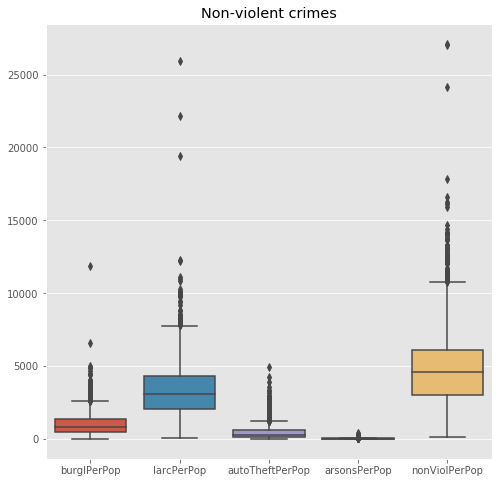

In [9]:
#Exploratory Data Analysis of Response Variables

data2=data[['burglPerPop', 'larcPerPop','autoTheftPerPop','arsonsPerPop','nonViolPerPop']]
#Boxplot of non violent crime variables
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
nonViolent = data2
xticklablesNV = ['burglPerPop','larcPerPop','autoTheftPerPop','arsonsPerPop','nonViolPerPop']
sns.boxplot(data=nonViolent)
ax.set(title="Non-violent crimes")
ax.set_xticklabels(xticklablesNV)
plt.show()

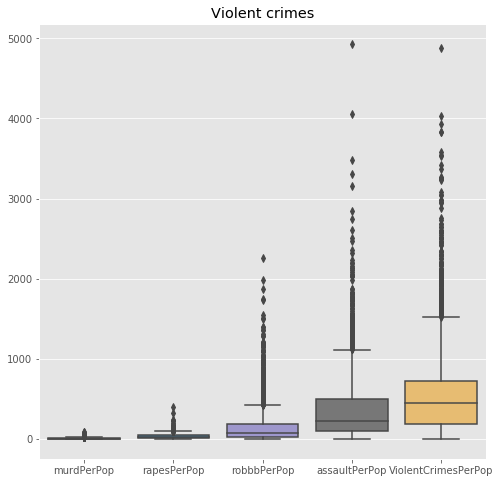

In [11]:
#Boxplot of Violent crime variables
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
Violent = data[['murdPerPop','rapesPerPop','robbbPerPop','assaultPerPop','ViolentCrimesPerPop']]
xticklablesV = ['murdPerPop','rapesPerPop','robbbPerPop','assaultPerPop','ViolentCrimesPerPop']
sns.boxplot(data=Violent)
ax.set(title="Violent crimes")
ax.set_xticklabels(xticklablesV)
plt.show()

In [88]:
#data['nonViolPerPop'].head(5)
nonviolent=data[['nonViolPerPop','communityname','state']]
nonviolentdata=nonviolent.sort_values(by=['nonViolPerPop'],ascending=False).head(10)
print(nonviolentdata)

      nonViolPerPop       communityname state
1905       27119.76  EastLongmeadowtown    MA
1004       27010.77    AtlanticCitycity    NJ
109        24116.36         Tukwilacity    WA
169        17859.42      Bellinghamcity    WA
360        16628.13     MyrtleBeachcity    SC
403        16233.94         Palatkacity    FL
2048       16092.17      MiamiBeachcity    FL
147        15920.01           Daniacity    FL
1874       14679.18           Miamicity    FL
781        14440.11     HarperWoodscity    MI


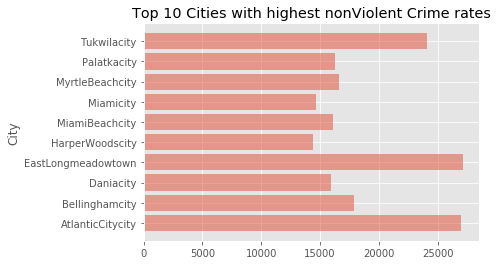

In [89]:
a1=nonviolentdata['nonViolPerPop']
b1=nonviolentdata['communityname']
plt.barh(b1, a1, align='center', alpha=0.5)
plt.ylabel('City')
plt.title('Top 10 Cities with highest nonViolent Crime rates')
plt.show()

In [90]:
a=data[['ViolentCrimesPerPop','communityname','state']]
y=a.sort_values(by=['ViolentCrimesPerPop'],ascending=False).head(10)
print(y)

      ViolentCrimesPerPop     communityname state
164               4877.06       Chestercity    PA
1605              4026.59       Atlantacity    GA
1213              3928.03        Newarkcity    NJ
988               3834.10    Alexandriacity    LA
1874              3829.21         Miamicity    FL
1004              3583.48  AtlanticCitycity    NJ
1593              3540.57      Annistoncity    AL
720               3530.78        Camdencity    NJ
760               3414.57   Spartanburgcity    SC
901               3364.91     Homesteadcity    FL


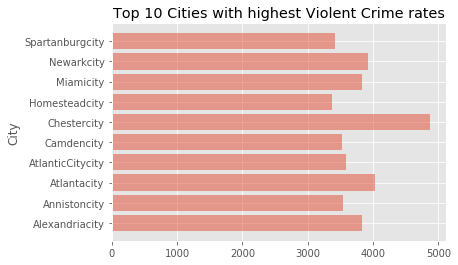

In [91]:
a1=y['ViolentCrimesPerPop']
b1=y['communityname']
plt.barh(b1, a1, align='center', alpha=0.5)
plt.ylabel('City')
plt.title('Top 10 Cities with highest Violent Crime rates')
plt.show()

In [92]:
state_group_by_violent=data[['ViolentCrimesPerPop','state']]
u=state_group_by_violent.groupby('state').mean()
u.sort_values(by=['ViolentCrimesPerPop'],ascending=False).head(10)


,ViolentCrimesPerPop
state,
DC,3048.380000
LA,1312.713636
SC,1233.455714
MD,1217.699167
FL,1159.046889
AL,1030.699070
GA,973.413514
NC,973.036087
DE,887.290000


In [93]:
state_group_by_non_violent=data[['nonViolPerPop','state']]
v=state_group_by_non_violent.groupby('state').mean()
v.sort_values(by=['nonViolPerPop'],ascending=False).head(10)


,nonViolPerPop
state,
DC,9252.350000
FL,8011.110222
GA,7804.054595
NC,7628.824565
WA,7400.330045
DE,7276.460000
LA,7110.889791
MS,6734.207000
SC,6603.452143


# Decision Trees

All numeric data was normalized into the decimal range 0.00-1.00 using an Unsupervised, equal-interval binning method. Attributes retain their distribution and skew (hence for example the population attribute has a mean value of 0.06 because most communities are small). E.g. An attribute described as 'mean people per household' is actually the normalized (0-1) version of that value. 


In [12]:
data = pd.read_csv(r"C:\Users\Samil\Desktop\communities-crime-clean.csv", na_values=['?'])

Creating a new field “highCrime” which is true if the crime rate per capita (ViolentCrimesPerPop) is greater than 0.1, or else false

In [13]:
data['highCrime'] = (data['ViolentCrimesPerPop']>0.1)
c = Counter()
c.update(data.highCrime)
print ("Positive HighCrime Instances: %.2f %% " % (c[True]/len(data.highCrime)*100))
print("Negative HighCrime Instances:  %.2f %%" % (c[False]/len(data.highCrime)*100))

Positive HighCrime Instances: 62.72 % 
Negative HighCrime Instances:  37.28 %


In [14]:
#removing non predictive features from data
data_original = data.copy()

del data['state']
del data['communityname']
del data['fold']
del data['ViolentCrimesPerPop']

In [15]:
columns = data.columns[:-1]
Target = data[data.columns[-1]]
data = pd.DataFrame(data,columns=columns)

Finding Depth of the tree to avoid possible overfitting by maximizing cv results
Graph shows, for max_depth=3, DecisionTreeClassifier gives best cv results

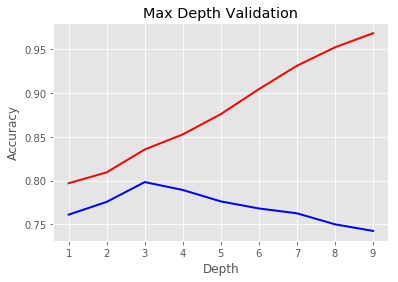

In [16]:
X_data = data
y_target = Target
train_data_score, test_data_score = validation_curve(DecisionTreeClassifier(),X_data,y_target,param_name='max_depth',param_range=range(1,10),cv=10,scoring="accuracy")
train_score_mean =np.mean(train_data_score, axis=1)
test_score_mean =np.mean(test_data_score, axis=1)

plt.title("Max Depth Validation")
plt.xlabel("Depth")
plt.ylabel("Accuracy")
lw=2
plt.plot(range(1,10),train_score_mean,label="Training score",color="RED",lw=lw)
plt.plot(range(1,10),test_score_mean,label="Cross-validation score",color="BLUE",lw=lw)
plt.show()

Fitting Data to Decision Tree Classifier

In [17]:
tree = DecisionTreeClassifier(random_state=0,max_depth=3)
tree.fit(X_data,y_target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

Trainig accuracy, Precision and Recall for the DecisionTreeClassifier using Training data

In [18]:
print("Accuracy on Decision Tree: %.4f"% (tree.score(X_data,y_target)))
print("Precision on Decision Tree: %.4f"% (precision(y_target,tree.predict(X_data))))
print("Recall on Decision Tree: %.4f"% (recall(y_target,tree.predict(X_data))))

Accuracy on Decision Tree: 0.8359
Precision on Decision Tree: 0.9003
Recall on Decision Tree: 0.8304


In [19]:
importance_tree = tree.feature_importances_
indices_tree = np.argsort(importance_tree)[::-1]
print("Top 10 Features used in classification.\n\n")
for f in range(0,10):
    print("%d. feature %d (%f)  ==> %s" % (f + 1, indices_tree[f], importance_tree[indices_tree[f]],data.columns[indices_tree[f]]))

Top 10 Features used in classification.


1. feature 44 (0.719944)  ==> PctKids2Par
2. feature 3 (0.168307)  ==> racePctWhite
3. feature 5 (0.091650)  ==> racePctHisp
4. feature 71 (0.020099)  ==> HousVacant
5. feature 99 (0.000000)  ==> LemasPctOfficDrugUn
6. feature 35 (0.000000)  ==> PctEmplProfServ
7. feature 27 (0.000000)  ==> NumUnderPov
8. feature 28 (0.000000)  ==> PctPopUnderPov
9. feature 29 (0.000000)  ==> PctLess9thGrade
10. feature 30 (0.000000)  ==> PctNotHSGrad


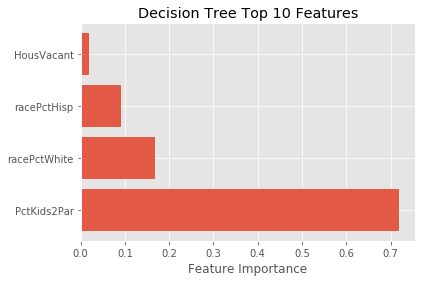

In [20]:
x_obj = []
for f in range(0,4):
    x_obj.append(data.columns[indices_tree[f]])
y_pos =np.arange(len(x_obj))
y_val =np.sort(importance_tree)[::-1][0:4]

plt.barh(y_pos,y_val,align='center',alpha=0.9)
plt.yticks(y_pos,x_obj)
plt.xlabel("Feature Importance")
plt.title("Decision Tree Top 10 Features")

plt.show()

Cross Val Score for Decision Tree Classifier using 10-fold CrossValidation

Why are they different from the results in the previous test?
During the first test case, we fit the DecisionTreeClassifier on whole data sets and we measure accuracy on it. So as there is no bias ( i.e. Overfitting) , it will give us high accuracy, precision and Recall value. But as for the Cross Validation, we have split data to exact 10 fold and trained our model on 9 fold and tested with 1 fold for 10 time by taking each time different training and test data sets. So eventually, there will be bias and it will give accuracy, precision and recall value less than previous one.

In [21]:
tree_accuracy=cross_val_score(tree,X_data,y_target,cv=10)
tree_precision = cross_val_score(tree,X_data,y_target,cv=10,scoring='precision')
tree_recall =cross_val_score(tree,X_data,y_target,cv=10,scoring='recall')

print("DecisionTreeClassifier Accuracy : %.4f (+/- %.4f)"% (tree_accuracy.mean(),tree_accuracy.std()*2))
print("DecisionTreeClassifier Precision: %.4f (+/- %.4f)"% (tree_precision.mean(),tree_precision.std()*2))
print("DecisionTreeClassifier Recall: %.4f (+/- %.4f)"% (tree_recall.mean(),tree_recall.std()*2))

DecisionTreeClassifier Accuracy : 0.7982 (+/- 0.1183)
DecisionTreeClassifier Precision: 0.8433 (+/- 0.1053)
DecisionTreeClassifier Recall: 0.8392 (+/- 0.2073)


# KNN 
### Self implemented code

In [22]:
data = pd.DataFrame(data,columns=columns)
X = data
Y = Target

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 25)

In [24]:
import math
def euclideanDistance(instance1, instance2, length):
    distance = 0
    for x in range(length):
        distance += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(distance)

In [25]:
import operator 
def getNeighbors(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        dist = euclideanDistance(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

In [26]:
def getResponse(neighbors):
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]

In [27]:

def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] is predictions[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0

In [28]:
X_train['highCrime'] = (y_train)
    #testSet=[X_test,y_test]
X_test['highCrime'] = (y_test)
    #print 'Train set: ' + repr(len(trainingSet))
    #print 'Test set: ' + repr(len(testSet))
X_train = X_train.values.tolist()
X_test = X_test.values.tolist()
    # generate predictions
predictions=[]
k = 3
for x in range(len(X_test)):
    neighbors = getNeighbors(X_train, X_test[x], k)
    result = getResponse(neighbors)
    predictions.append(result)
    #print('> predicted=' + repr(result) + ', actual=' + repr(X_test[x][-1]))
accuracy = getAccuracy(X_test, predictions)
knnacc=accuracy
print('Accuracy: ' + repr(accuracy) + '%')

C:\Users\Samil\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Samil\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Accuracy: 81.203007518797%


# Linear Classification
- GaussianNB

In [29]:
gnb_clf =GaussianNB()
gnb_clf.fit(X_data,y_target)

GaussianNB(priors=None)

The 10-fold cross-validation accuracy, precision, and recall

In [30]:
accuracy_score = cross_val_score(gnb_clf,X_data,y_target,cv=10)
precision_score = cross_val_score(gnb_clf,X_data,y_target,cv=10,scoring='precision')
recall_score = cross_val_score(gnb_clf,X_data,y_target,cv=10,scoring='recall')

print("GaussianNB  Accuracy: %0.3f (+/- %0.3f)"%(accuracy_score.mean(),accuracy_score.std()*2))
print("GaussianNB  Precision: %0.3f (+/- %0.3f)"%(precision_score.mean(),precision_score.std()*2))
print("GaussianNB  Recall: %0.3f (+/- %0.3f)"%(recall_score.mean(),recall_score.std()*2))

GaussianNB  Accuracy: 0.762 (+/- 0.108)
GaussianNB  Precision: 0.912 (+/- 0.116)
GaussianNB  Recall: 0.692 (+/- 0.183)


The 10 most predictive features

In [31]:
top_gnb_features = np.abs(gnb_clf.theta_[0]-gnb_clf.theta_[1])/(gnb_clf.sigma_[0]+gnb_clf.sigma_[1])
top_indices_GNB=top_gnb_features.argsort()[::-1]
top_gnb_features= np.sort(top_gnb_features)[::-1]
print ("Top 10 GaussianNB Features\n\n")
for i in range(0,10):
    print("%d. Features %d (%f) => %s"%(i+1,top_indices_GNB[i],top_gnb_features[i],X_data.columns[top_indices_GNB[i]]))

Top 10 GaussianNB Features


1. Features 44 (5.001310) => PctKids2Par
2. Features 40 (4.756886) => FemalePctDiv
3. Features 43 (4.593988) => PctFam2Par
4. Features 15 (4.394991) => pctWInvInc
5. Features 41 (4.385986) => TotalPctDiv
6. Features 46 (3.999354) => PctTeen2Par
7. Features 38 (3.950731) => MalePctDivorce
8. Features 45 (3.648301) => PctYoungKids2Par
9. Features 50 (3.469889) => PctIlleg
10. Features 3 (3.443228) => racePctWhite


As the (gnbclf.theta[0]-gnbclf.theta[1]) gives the distance betweet two features, the larger the difference , a feature can be diffrentiated well. That's why, the given equation is able to predict more predictive features

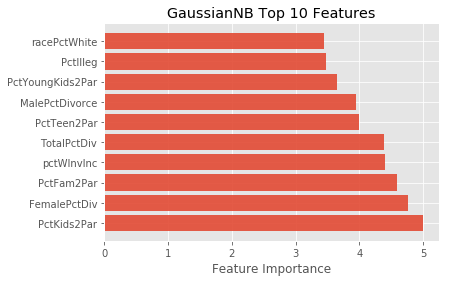

In [32]:
x_obj = []
for f in range(0,10):
    x_obj.append(data.columns[top_indices_GNB[f]])
y_pos =np.arange(len(x_obj))
y_val =np.sort(top_gnb_features)[::-1][0:10]

plt.barh(y_pos,y_val,align='center',alpha=0.9)
plt.yticks(y_pos,x_obj)
plt.xlabel("Feature Importance")
plt.title("GaussianNB Top 10 Features")

plt.show()

## How do these results compare with your results from decision trees, above?

DT: 0.798244 (0.059135)
GNB: 0.761608 (0.054241)


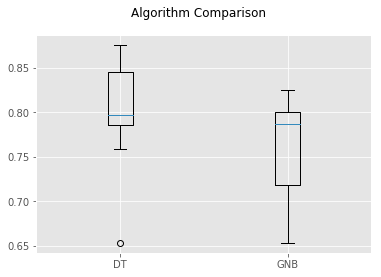

In [33]:
models =[]
models.append(("DT",DecisionTreeClassifier(max_depth=3)))
models.append(("GNB",GaussianNB()))

results=[]
names=[]
scoring='accuracy'
for name,model in models:
    kfold = model_selection.KFold(n_splits=10,random_state=0)
    cv_results = model_selection.cross_val_score(model, X_data, y_target, cv=10, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Top 10 Predictive Features comparision

In [34]:
for i in range(0,10):   
    print("%-3d. GaussianNB Feature:(%3d)   %-20s \t DecisionTreeClassifier (%3d)  %-20s"%(i+1,top_indices_GNB[i],X_data.columns[top_indices_GNB[i]], indices_tree[i],data.columns[indices_tree[i]]))

1  . GaussianNB Feature:( 44)   PctKids2Par          	 DecisionTreeClassifier ( 44)  PctKids2Par         
2  . GaussianNB Feature:( 40)   FemalePctDiv         	 DecisionTreeClassifier (  3)  racePctWhite        
3  . GaussianNB Feature:( 43)   PctFam2Par           	 DecisionTreeClassifier (  5)  racePctHisp         
4  . GaussianNB Feature:( 15)   pctWInvInc           	 DecisionTreeClassifier ( 71)  HousVacant          
5  . GaussianNB Feature:( 41)   TotalPctDiv          	 DecisionTreeClassifier ( 99)  LemasPctOfficDrugUn 
6  . GaussianNB Feature:( 46)   PctTeen2Par          	 DecisionTreeClassifier ( 35)  PctEmplProfServ     
7  . GaussianNB Feature:( 38)   MalePctDivorce       	 DecisionTreeClassifier ( 27)  NumUnderPov         
8  . GaussianNB Feature:( 45)   PctYoungKids2Par     	 DecisionTreeClassifier ( 28)  PctPopUnderPov      
9  . GaussianNB Feature:( 50)   PctIlleg             	 DecisionTreeClassifier ( 29)  PctLess9thGrade     
10 . GaussianNB Feature:(  3)   racePctWhite  

Comparision Results:
By comparing GaussianNB and DecisionTreeClassifier, DecisionTreeClassifier gives better accuracy on dataset. and PctKids2Par is the same most predictive features in both the model

## Regression
### Linear Regression

In [35]:
y_target_violentCrimesPerPop = data_original['ViolentCrimesPerPop']
lr_clf = linear_model.LinearRegression()
lr_clf.fit(X_data,y_target_violentCrimesPerPop)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Using 10-fold cross-validation, the estimated mean-squared-error (MSE)

In [36]:
y_lr_predict = cross_val_predict(lr_clf,X_data,y_target_violentCrimesPerPop,cv=10)

pt_x1 = mean_squared_error(y_target_violentCrimesPerPop,y_lr_predict)
print("The estimated mean-squared-error (MSE): %f "%(pt_x1))

The estimated mean-squared-error (MSE): 0.020103 


## The MSE on the training set

In [37]:
y_lr_train_predict = lr_clf.predict(X_data)
print("The estimated mean-squared-error (MSE): %f "%(mean_squared_error(y_target_violentCrimesPerPop,y_lr_train_predict)))

The estimated mean-squared-error (MSE): 0.016517 


## Top 10 predictive features of a high crime rate
### Most Predictive Features in High Crime Rate is PersPerOccupHous

In [38]:
lr_coeff_high_crime = np.argsort(lr_clf.coef_)[::-1]
print("Top 10 Features for High Crime Rate:")
for i in range(0,10):
    print("%2d. Features:    %s"%(i+1, X_data.columns[lr_coeff_high_crime[i]]))

Top 10 Features for High Crime Rate:
 1. Features:    PersPerOccupHous
 2. Features:    PctHousOwnOcc
 3. Features:    MalePctDivorce
 4. Features:    PctRecImmig8
 5. Features:    MedRent
 6. Features:    medFamInc
 7. Features:    PctEmploy
 8. Features:    MalePctNevMarr
 9. Features:    PctPersDenseHous
10. Features:    OwnOccMedVal


# Top 10 predictive features of a low crime rate

### Most Predictive features of a low crime rate is PctPersOwnOccup

In [39]:
lr_coeff_low_crime  = np.argsort(lr_clf.coef_)
print("Top 10 Features for Low Crime Rate:")
for i in range(0,10):
    print("%2d. Features:  %s"%(i+1, X_data.columns[lr_coeff_low_crime[i]]))

Top 10 Features for Low Crime Rate:
 1. Features:  PctPersOwnOccup
 2. Features:  TotalPctDiv
 3. Features:  whitePerCap
 4. Features:  PctKids2Par
 5. Features:  OwnOccLowQuart
 6. Features:  numbUrban
 7. Features:  PersPerRentOccHous
 8. Features:  RentLowQ
 9. Features:  agePct12t29
10. Features:  PctRecImmig5


# Random Forest

In [40]:
random_forest_clf = RandomForestClassifier(random_state=0)
random_forest_clf.fit(X_data,y_target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

# Cross Validation Metrics

In [41]:
tree_accuracy=cross_val_score(random_forest_clf,X_data,y_target,cv=10)
tree_precision = cross_val_score(random_forest_clf,X_data,y_target,cv=10,scoring='precision')
tree_recall =cross_val_score(random_forest_clf,X_data,y_target,cv=10,scoring='recall')

print("DecisionTreeClassifier Accuracy : %.4f (+/- %.4f)"% (tree_accuracy.mean(),tree_accuracy.std()*2))
print("DecisionTreeClassifier Precision: %.4f (+/- %.4f)"% (tree_precision.mean(),tree_precision.std()*2))
print("DecisionTreeClassifier Recall: %.4f (+/- %.4f)"% (tree_recall.mean(),tree_recall.std()*2))

DecisionTreeClassifier Accuracy : 0.7912 (+/- 0.0944)
DecisionTreeClassifier Precision: 0.8466 (+/- 0.0598)
DecisionTreeClassifier Recall: 0.8192 (+/- 0.2067)


## Most Predictive Features

In [42]:
importance_tree = random_forest_clf.feature_importances_
indices_tree = np.argsort(importance_tree)[::-1]
print("Top 10 Features used in classification.\n\n")
for f in range(0,4):
    print("%d. feature %d (%f)  ==> %s" % (f + 1, indices_tree[f], importance_tree[indices_tree[f]],data.columns[indices_tree[f]]))

Top 10 Features used in classification.


1. feature 43 (0.095354)  ==> PctFam2Par
2. feature 3 (0.052369)  ==> racePctWhite
3. feature 40 (0.050754)  ==> FemalePctDiv
4. feature 28 (0.047153)  ==> PctPopUnderPov


# GradientBoostingClassifier

In [43]:
gradientBoostingClassifier = GradientBoostingClassifier(n_estimators=100,learning_rate=1.0,max_depth=1,random_state=0)
gradientBoostingClassifier.fit(X_data,y_target)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

## Cross Validation Metrics

In [44]:
accuracy_score = cross_val_score(gradientBoostingClassifier,X_data,y_target,cv=10)
precision_score = cross_val_score(gradientBoostingClassifier,X_data,y_target,cv=10,scoring='precision')
recall_score = cross_val_score(gradientBoostingClassifier,X_data,y_target,cv=10,scoring='recall')

print("GradientBoostingClassifier  Accuracy: %0.3f (+/- %0.3f)"%(accuracy_score.mean(),accuracy_score.std()*2))
print("GradientBoostingClassifier  Precision: %0.3f (+/- %0.3f)"%(precision_score.mean(),precision_score.std()*2))
print("GradientBoostingClassifier  Recall: %0.3f (+/- %0.3f)"%(recall_score.mean(),recall_score.std()*2))


GradientBoostingClassifier  Accuracy: 0.789 (+/- 0.071)
GradientBoostingClassifier  Precision: 0.843 (+/- 0.100)
GradientBoostingClassifier  Recall: 0.826 (+/- 0.195)


## Most Predictive Features

In [45]:
importance_tree = gradientBoostingClassifier.feature_importances_
indices_tree = np.argsort(importance_tree)[::-1]
print("Top 10 Features used in classification.\n\n")
for f in range(0,10):
    print("%d. feature %d (%f)  ==> %s" % (f + 1, indices_tree[f], importance_tree[indices_tree[f]],data.columns[indices_tree[f]]))

Top 10 Features used in classification.


1. feature 75 (0.060000)  ==> PctVacMore6Mos
2. feature 44 (0.060000)  ==> PctKids2Par
3. feature 3 (0.040000)  ==> racePctWhite
4. feature 6 (0.040000)  ==> agePct12t21
5. feature 20 (0.030000)  ==> perCapInc
6. feature 34 (0.030000)  ==> PctEmplManu
7. feature 15 (0.030000)  ==> pctWInvInc
8. feature 94 (0.030000)  ==> PctSameCity85
9. feature 42 (0.030000)  ==> PersPerFam
10. feature 88 (0.030000)  ==> MedOwnCostPctIncNoMtg


# Algorithm Comparision

RF: 0.790704 (0.048550)
nlSVM: 0.691397 (0.037287)
GBoost: 0.789221 (0.035580)
DT: 0.798244 (0.059135)
GNB: 0.761608 (0.054241)
SVM: 0.796234 (0.054686)


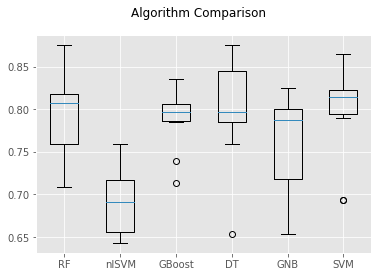

In [46]:
models =[]
models.append(("RF",RandomForestClassifier()))
models.append(("nlSVM",svm.SVC(kernel='poly')))
models.append(("GBoost",GradientBoostingClassifier(n_estimators=100,learning_rate=1.0,max_depth=1,random_state=0)))
models.append(("DT",DecisionTreeClassifier(random_state=0,max_depth=3)))
models.append(("GNB",GaussianNB()))
models.append(("SVM",svm.LinearSVC()))




results=[]
names=[]
scoring='accuracy'
for name,model in models:
    kfold = model_selection.KFold(n_splits=10,random_state=0)
    cv_results = model_selection.cross_val_score(model, X_data, y_target, cv=10, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## From the above methods, 'PctKids2Par' is the most consistent features in predicting High Crime Rates

# Insights and Recommendations

Foot policing should be increased in DC as it has highest number of NonViolent as well as Violent crime rates. Ex Philadelphia Hotspot policing has long been a key component of the Philadelphia Police Department. A 2009 experiment in the city found that increased foot patrols in hotspots—geographic regions as small as one block with a higher-than-average crime rate—correlated with a 23 percent decrease in violent crime over three months relative to areas without increased foot patrols.
Most of the Atlanta Counties with Median Rent $1000 has high crime rate 

New projects in poorer neighborhoods increased surrounding home prices and reduced crime.

Neighborhood safety is closely connected with the number of businesses, access to public spaces, and housing and rental prices.

New York City where violent crime was most negatively correlated with rent, while property crime (e.g. burglary or motor vehicle theft) was less so.

Obvious insight is more the population more is the crime rate